<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/7_Logistic_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

Logistic regression is a widely used discriminative classification model $p(y|\mathbf{x}; \theta)$, where $\mathbf{x}$ is a fixed-dimensional input vector, $y\in\{1,\dots, C\}$ in the **discrete** class label, and $\theta$ are the parameters. If $C=2$, this is known as **binary logistic regression** (we will use $C\in\{0,1\}$), and if $C>2$, it is known as multinomial
logistic regression, or alternatively, multiclass logistic regression. 

## Perceptron for binary logistic regression

Example: Input is the pixels of images, output is cat/dog.

Given an feature input $[x_1,x_2,\dots, x_d]\in \mathbb{R}^d$ (again we define $\mathbf{x}=[1, x_1, x_2, \dots, x_d ]^\top$), perceptron is the composition of linear model and binary step function: 

$$\phi(\mathbf{w}^\top\mathbf{x})=\begin{cases} 1 (\text{class 1})& \text{if }  \mathbf{w}^\top\mathbf{x}>0 \\   0(\text{class 0}) & \text{otherwise}\end{cases} $$

$\phi$ is called activation function； weights $\mathbf{w}\in \mathbb{R}^{d+1}$, are model parameters. 

It is a model of a single neuron that can be used for two-class classification problems and provides the foundation for later developing much larger networks.



In [53]:
%pylab inline 
from IPython.display import Image

Image(url='https://github.com/yexf308/MAT592/blob/main/image/perceptron.png?raw=true', width=600)

Populating the interactive namespace from numpy and matplotlib


Given a set of training samples $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^N$, 
 \begin{align}
 L_i(\mathbf{w})&=(y^{(i)} - \phi(\mathbf{w}^\top\mathbf{x}^{(i)}) )^2 \\
  \text{arg}\min_{\mathbf{w}}\text{RSS}(\mathbf{w})&=  \text{arg}\min_{\mathbf{w}}\sum_{i=1}^N L_i(\mathbf{w}) \\
 \end{align}

Perceptron can not be learned by (sub)gradient methods because $L_i(\mathbf{w})$ is discontinuous and has zero gradient almost everywhere (piecewise constant). 
$$ \nabla L_i(\mathbf{w})=(\phi(\mathbf{w}^\top\mathbf{x}^{(i)})-y^{(i)})\cdot \color{red}{\phi'(\mathbf{w}^\top\mathbf{x}^{(i)})}\cdot \mathbf{x}^{(i)}$$ 
$\phi'(z)=0$ when $z\ne 0$ and doesn't exist at $z=0$. 

### Gradient descent method
Use the "fake" gradient, 
$$\mathbf{w} \leftarrow \mathbf{w}-\eta \sum_{i=1}^N\left( \phi(\mathbf{w}^{\top}\mathbf{x}^{(i)})- y^{(i)}\right) \mathbf{x}^{(i)} $$

The intuitive interpretation: if the prediction is
correct, no change is made, otherwise we move the weights in a direction so as to make the correct answer more likely. 

### Stochastic Gradient descent 

In machine learning, we can use a technique that evaluates and updates the weights every iteration called **stochastic gradient descent** to minimize the error of a model on our training data. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

- Choose an initial vector of parameters $\mathbf{w}$ and learning rate $\mathbf{\eta}$.

- Repeat until an approximate minimum is obtained:



1.   Randomly shuffle examples in the training set.
2.   For $i=1,2, \dots, N$, do, 
 $$ \mathbf{w} \leftarrow \mathbf{w}-\eta \left( \phi(\mathbf{w}^{\top}\mathbf{x}^{(i)})- y^{(i)}\right) \mathbf{x}^{(i)} $$





In [54]:
# Make a prediction with weights
def predict(x, w):
	activation = w.dot(x)

	return 1.0 if activation >= 0.0 else 0.0


In [85]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(X, y, l_rate, n_iter):
  n, m    = X.shape
  weights = zeros(m)
  for iter in range(n_iter):
    sum_error = 0;
    arr = np.arange(n)
    random.shuffle(arr)
    for i in arr:
      prediction = predict(X[i,:], weights)
      error      = prediction - y[i]
      sum_error  = error**2 + sum_error
      if error !=0:
        weights = weights - l_rate * error * X[i,:]

    print('sum_error at ',iter+1, 'iteration is ', sum_error)
    if sum_error == 0:
      break

  return weights


[[ 1.          2.7810836   2.550537  ]
 [ 1.          1.46548937  2.36212508]
 [ 1.          3.39656169  4.40029353]
 [ 1.          1.38807019  1.85022032]
 [ 1.          3.06407232  3.00530597]
 [ 1.          7.62753121  2.75926224]
 [ 1.          5.33244125  2.08862677]
 [ 1.          6.92259672  1.77106367]
 [ 1.          8.67541865 -0.24206865]
 [ 1.          7.67375647  3.50856301]]


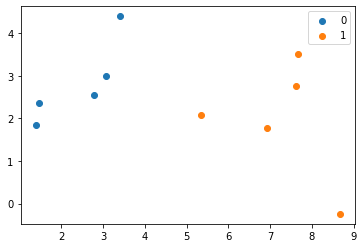

In [89]:
dataset = array([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
leg = ax.legend();

X = hstack([ones((dataset.shape[0],1)), dataset[:,0:2] ])
y = dataset[:,2]
print(X)



sum_error at  1 iteration is  4.0
sum_error at  2 iteration is  4.0
sum_error at  3 iteration is  2.0
sum_error at  4 iteration is  0.0
[-0.4         0.60173816 -0.86293877]


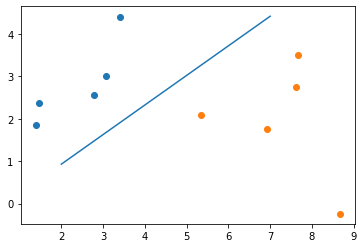

In [92]:
l_rate = 0.1
n_iter = 5
weights = train_weights(X, y, l_rate, n_iter)
print(weights)

x_span = linspace(2,7,100)
y_span = -(weights[0] + weights[1] * x_span)/weights[2]
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
plot(x_span, y_span)

- Unlike gradient descent, perceptron algorithm does NOT always converge
since it uses fake `gradient'.

- however, it converges to the global minimum 0 (perfect classication),
when the training data is linearly separable. With the optimal $\mathbf{w}^*$ defines a hyperplane (decision boundary) separating the two classes. 

- In the next HW, you will encounter some data sets that are not linearly separable. 

- the more general multi-layer perceptron compositing several linear and
non-linear functions, is the prototype of modern **deep neural networks**.


## Logistic regression
Replace binary activation function in perceptron by the sigmoid activation
function. 

$$ \sigma(z)=\frac{1}{1+\exp(-z)}\in(0,1)$$

Given an input $\mathbf{x}$, the logistic model outputs $\phi(\mathbf{w}^\top\mathbf{x})$ can be interpreted as the probability that $\mathbf{x}$ belongs to Class 1.

Prediction: the probability $\phi(\mathbf{w}^\top\mathbf{x})$,
 
 \begin{equation}
 \mathbf{x} \in \begin{cases} 1 \text{ (class 1)} & \text{if } \phi(\mathbf{w}^\top\mathbf{x})>1/2 \\
 0\text{ (class 0)} & \text{if }\phi(\mathbf{w}^\top\mathbf{x})<1/2 \end{cases}
 \end{equation}

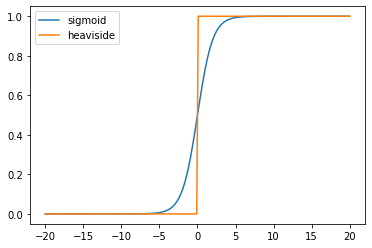

In [97]:
z = linspace(-20,20, 200)
sigma = 1/(1+exp(-z))
h = heaviside(z,0.5)
fig, ax = plt.subplots()
ax.plot(z,sigma,label='sigmoid')
ax.plot(z, h,label='heaviside')
leg = ax.legend();